In [603]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [604]:
df=pd.read_csv("Data/Word Rank University.csv")

In [605]:
df_shanghaiRanking=pd.read_csv("Data/shanghai Ranking.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [435]:
df.head()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1.0,Harvard University,USA,1,1,1,1,1,100.0
1,2.0,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3.0,Stanford University,USA,3,11,4,2,2,95.2
3,4.0,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5.0,University of Oxford,United Kingdom,2,7,27,9,4,93.3


In [436]:
df_shanghaiRanking.head()

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/_uni/logo/8d986...,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/_uni/logo/0ff17...,http://www.shanghairanking.com/institution/uni...


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB


In [433]:
df_shanghaiRanking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 1000 non-null   object 
 1   University Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Total Score             1000 non-null   float64
 4   LOGO                    1000 non-null   object 
 5   University Detail       1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [356]:
df.columns 

Index(['World Rank', 'University Names', 'Location ', 'National Rank',
       'Educational Rank', 'Employability Rank', 'Faculty Rank',
       'Research Rank', 'Score'],
      dtype='object')

In [437]:
df_shanghaiRanking.columns

Index(['Ranking', 'University Name', 'National/Regional Rank', 'Total Score',
       'LOGO', 'University Detail '],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [357]:
# the datasets were sourced from the Kaggle website, which collected 3 datasets from sites THE and Shanghai

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [358]:
#Last Update is 9 Month ago 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [359]:
#It is only from Kaggle that the source is available but between 3 dataset The Rank of universities varies according to the criteria of the sites

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [360]:
df.head()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


In [441]:
df_shanghaiRanking.head()

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/_uni/logo/8d986...,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/_uni/logo/0ff17...,http://www.shanghairanking.com/institution/uni...


In [519]:
df_shanghaiRanking.drop(["LOGO"],axis=1,inplace=True)

In [520]:
df_shanghaiRanking.drop(["University Detail "],axis=1,inplace=True)

In [501]:
df_shanghaiRanking

,Ranking,University Name,National/Regional Rank,Total Score
0,1,Harvard University,1,100.0
1,2,Stanford University,2,76.8
2,3,Massachusetts Institute of Technology (MIT),3,70.1
3,4,University of Cambridge,1,69.6
4,5,"University of California, Berkeley",4,65.3
...,...,...,...,...
995,901-1000,University of Wuppertal,46-47,0.0
996,901-1000,Warsaw University of Technology,7-11,0.0
997,901-1000,Western Norway University of Applied Sciences,6-7,0.0
998,901-1000,Wroclaw University of Science and Technology,7-11,0.0


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [361]:
#Check for and remove duplicate records
df.duplicated().sum()

0

In [580]:
df_shanghaiRanking.duplicated().sum()

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [362]:
#checking for null values
df.isnull().sum().sort_values(ascending = False)

World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [449]:
df_shanghaiRanking.isnull().sum().sort_values(ascending = False)

Ranking                   0
University Name           0
National/Regional Rank    0
Total Score               0
dtype: int64

In [363]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB


In [450]:
df_shanghaiRanking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 1000 non-null   object 
 1   University Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Total Score             1000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [365]:
# go to clean them 

In [366]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [367]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [368]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [369]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [370]:
df.head(5)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


In [371]:
df.columns=['World Rank','University Names','Location','National Rank','Educational Rank','Employability Rank','Faculty Rank','Research Rank','Score']


In [372]:
df.head()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB


In [375]:
#dataset has null Value
Zeros=df[(df == 0).any(axis=1)]

In [411]:
# dataset without null value 
df2=df[(df != 0).all(axis=1)]

In [377]:
Zeros.sort_values(by='World Rank')

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
999,1000Top 4.9%,Shantou University,China,152,0,0,0,955,70.4
1000,1001Top 4.9%,Tokai University,Japan,35,0,0,0,957,70.4
1001,1002Top 4.9%,Babson College,USA,212,0,38,0,0,70.4
1002,1003Top 4.9%,Victoria University,Australia,28,0,0,0,958,70.4
1003,1004Top 4.9%,University of Hyogo,Japan,36,0,0,107,1527,70.4
...,...,...,...,...,...,...,...,...,...
994,995Top 4.9%,University of Extremadura,Spain,34,0,0,0,952,70.4
995,996Top 4.9%,Hebei University of Technology,China,151,0,1394,0,953,70.4
996,997Top 4.9%,Villanova University,USA,210,181,149,0,1196,70.4
997,998Top 4.9%,University of Regina,Canada,28,0,1579,0,954,70.4


In [378]:
# go back to 6th dimention --> Completeness

In [385]:
df['World Rank'] = df['World Rank'].astype(float)
df['National Rank'] = df['National Rank'].astype(int)
df['Educational Rank'] = df['Educational Rank'].astype(int)
df['Employability Rank'] = df['Employability Rank'].astype(int)
df['Faculty Rank'] = df['Faculty Rank'].astype(int)
df['Research Rank'] = df['Research Rank'].astype(int)


In [572]:
# Slice the DataFrame to include rows with index from 100 to 999
sliced_df = df_shanghaiRanking.iloc[100:1000]

sorted_df = sliced_df.sort_values(by='Total Score', ascending=False)


sorted_df['Ranking'] = range(1, len(sorted_df) + 1)

df_shanghaiRanking.loc[sorted_df.index, 'Ranking'] = sorted_df['Ranking']



In [573]:
df_shanghaiRanking

,Ranking,University Name,National/Regional Rank,Total Score
0,1,Harvard University,1,100.0
1,2,Stanford University,2,76.8
2,3,Massachusetts Institute of Technology (MIT),3,70.1
3,4,University of Cambridge,1,69.6
4,5,"University of California, Berkeley",4,65.3
...,...,...,...,...
995,327,University of Wuppertal,46-47,0.0
996,315,Warsaw University of Technology,7-11,0.0
997,258,Western Norway University of Applied Sciences,6-7,0.0
998,246,Wroclaw University of Science and Technology,7-11,0.0


In [511]:
#df_shanghaiRanking[df_shanghaiRanking['Ranking'].str.contains('101-150')].sort_values(by=['Total Score'],ascending=False)

,Ranking,University Name,National/Regional Rank,Total Score
944,411,National University of La Plata,2,0.0
978,201,University of Klagenfurt,13,0.0
980,217,University of Los Andes (Colombia),2,0.0
984,225,University of Novi Sad,2,0.0
991,185,University of Tours,28,0.0


In [585]:
df_shanghaiRanking['Ranking']=df_shanghaiRanking['Ranking'].astype(int)

In [586]:
df_shanghaiRanking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 1000 non-null   int32  
 1   University Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Total Score             1000 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 27.5+ KB


### Correcting errors

-------------------

In [382]:
df.replace('-', 0, inplace=True)

In [383]:
df["University Names"]=df["University Names"].apply(lambda x: x.split("\n ")[0])

In [384]:
df['World Rank']=df['World Rank'].apply(lambda x: x.split('T')[0])

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


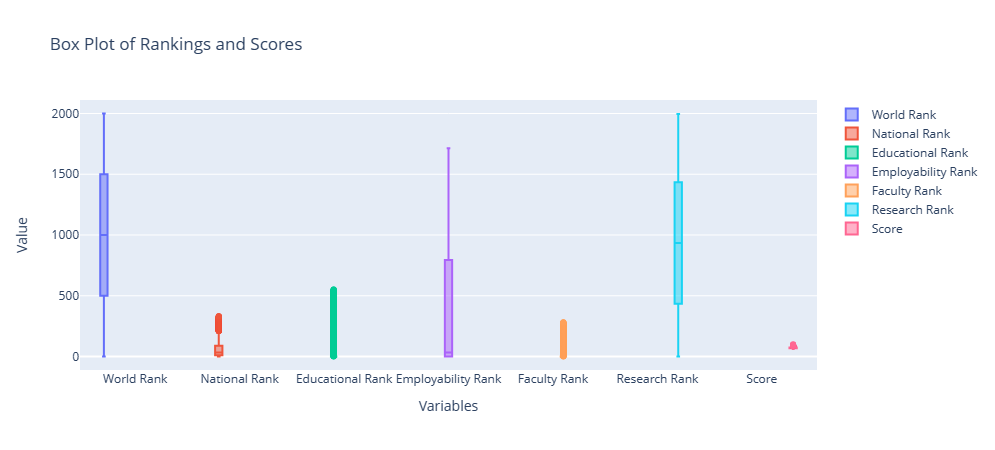

In [397]:

# Create box plot traces
box_traces = []
for column in ['World Rank', 'National Rank', 'Educational Rank', 'Employability Rank', 'Faculty Rank', 'Research Rank', 'Score']:
    box_trace = go.Box(
        y=df[column],
        name=column
    )
    box_traces.append(box_trace)

# Create figure with larger dimensions
fig = go.Figure(data=box_traces)

# Define layout
fig.update_layout(
    title='Box Plot of Rankings and Scores',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Value'),
    boxmode='group',  # Group box plots together
    width=1000,  # Set the width of the plot
    height=450,  # Set the height of the plot
)

# Show plot
fig.show()


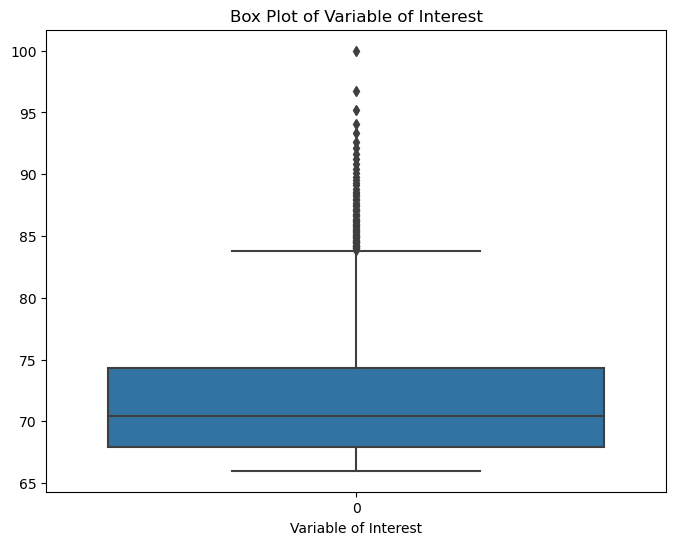

In [399]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Score'])
plt.title('Box Plot of Variable of Interest')
plt.xlabel('Variable of Interest')
plt.show()

# Calculate quartiles and IQR
Q1 = df['Score'].quantile(0.25)
Q3 = df['Score'].quantile(0.75)
IQR = Q3 - Q1


In [400]:
lower_limit= Q1 - 1.5 * IQR
upper_limit= Q3 + 1.5 * IQR
lower_limit ,upper_limit

(58.30000000000002, 83.89999999999998)

In [401]:
# Outlier 1 is Natural outlier
df[(df['Score'] < lower_limit) | (df['Score'] > upper_limit)]

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1.0,Harvard University,USA,1,1,1,1,1,100.0
1,2.0,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3.0,Stanford University,USA,3,11,4,2,2,95.2
3,4.0,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5.0,University of Oxford,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
56,57.0,University of Melbourne,Australia,1,142,411,130,33,84.2
57,58.0,Free University of Berlin,Germany,2,80,1123,44,76,84.1
58,59.0,Humboldt University of Berlin,Germany,3,85,1532,50,69,84.0
59,60.0,Ohio State University,USA,32,129,294,133,40,84.0


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [ ]:
count= df["Location"].value_counts()

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [ ]:
top_locations = df['Location'].value_counts()[:10]

# Create a DataFrame from the value counts
top_locations_df = top_locations.reset_index()
top_locations_df.columns = ['Location', 'Number of Universities']

# Create bar plot using Plotly Express
fig = px.bar(top_locations_df, x='Location', y='Number of Universities', 
             title='Top 10 Locations with the Most Universities',
             labels={'Location': 'Location', 'Number of Universities': 'Number of Universities'},
             text='Number of Universities',  # Text to display above each bar
             height=500)

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Adjust text position
fig.update_traces(textposition='outside')

# Show plot
fig.show()

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

In [ ]:
plt.boxplot(df['Score'])
plt.xlabel('')
plt.ylabel('')
plt.title(f'')
plt.show()

In [ ]:
plt.hist(df['Score'],facecolor = 'c', edgecolor = 'Black', bins = 15) # bins = 6 means 6 bars
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title(f'Histogram of Score')
plt.show()

In [ ]:
Q1=df['Score'].quantile(0.25)
Q3=df['Score'].quantile(0.75)
Q1, Q3

In [ ]:
IQR = Q3 - Q1
IQR

In [ ]:
lower_limit= Q1 - 1.5 * IQR
upper_limit= Q3 + 1.5 * IQR
lower_limit ,upper_limit

In [ ]:
# Outlier 1 is Natural outlier
df[(df['Score'] < lower_limit) | (df['Score'] > upper_limit)]

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [ ]:
df.describe()

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

In [424]:
top_locations_df= df.head(10)

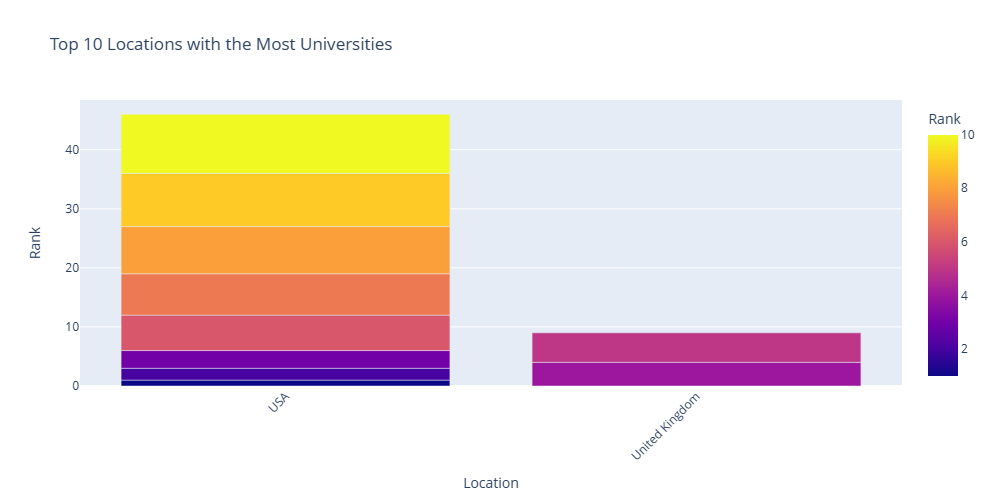

In [426]:
fig = px.bar(top_locations_df, x='Location', y='World Rank', 
             title='Top 10 Locations with the Most Universities',
             labels={'Location': 'Location', 'World Rank': 'Rank'},
             color='World Rank',  # Color scale based on 'World Rank'
             height=500)

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show plot
fig.show()

In [ ]:
df

**Categorical & numerical --> (scatter plot, histogram, box plot)**

In [ ]:
plt.figure(figsize=(15,8))

sns.boxplot(
    df,
    y="Score",
    hue="Location");

In [ ]:
plt.figure(figsize=(15,8))

sns.boxplot(
    df,
    y="Score",
    hue="World Rank");

**numerical & numerical --> (Scatter plot, line chart)**

In [ ]:
plt.scatter(df['Score'],df['Faculty Rank']) 
plt.title('speed / pace',fontsize = 20)
plt.xlabel('score',fontsize = 20)
plt.ylabel('rank',fontsize = 20)

plt.show()

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

In [ ]:
sns.pairplot(df)

In [ ]:
df

In [ ]:
df.isnull().sum()

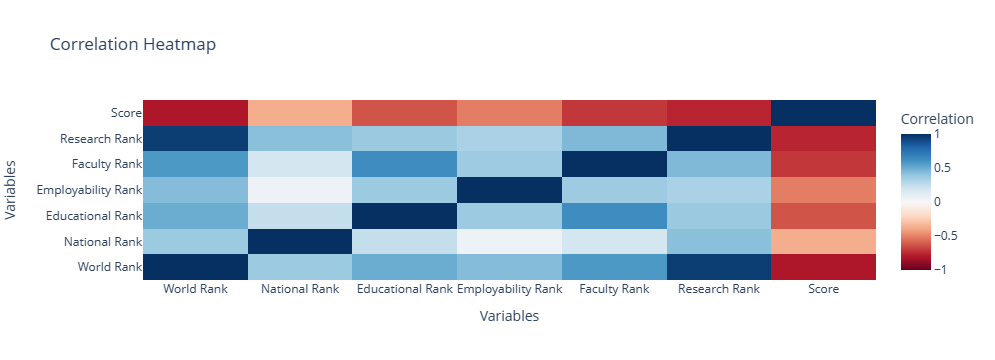

In [419]:
import plotly.graph_objects as go

# Define data
data = df2[['World Rank', 'National Rank', 'Educational Rank', 'Employability Rank', 'Faculty Rank', 'Research Rank', 'Score']].corr()

# Create heatmap trace
heatmap_trace = go.Heatmap(
    z=data.values,  # correlation values
    x=data.columns,  # column names
    y=data.columns,  # row names
    colorscale='RdBu',  # color scale
    colorbar=dict(title='Correlation'),  # color bar title
    zmin=-1,  # minimum value for color scale
    zmax=1,   # maximum value for color scale
    hoverongaps=False,  # disable hover on gaps (NaN values)
    text=data.round(2),  # rounded correlation values
    hoverinfo='text'  # show text on hover
)

# Define layout
layout = go.Layout(
    title='Correlation Heatmap',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),
)

# Create figure
fig = go.Figure(data=heatmap_trace, layout=layout)

# Show plot
fig.show()


In [407]:
correlation_matrix = df.select_dtypes(include=np.number).corr()

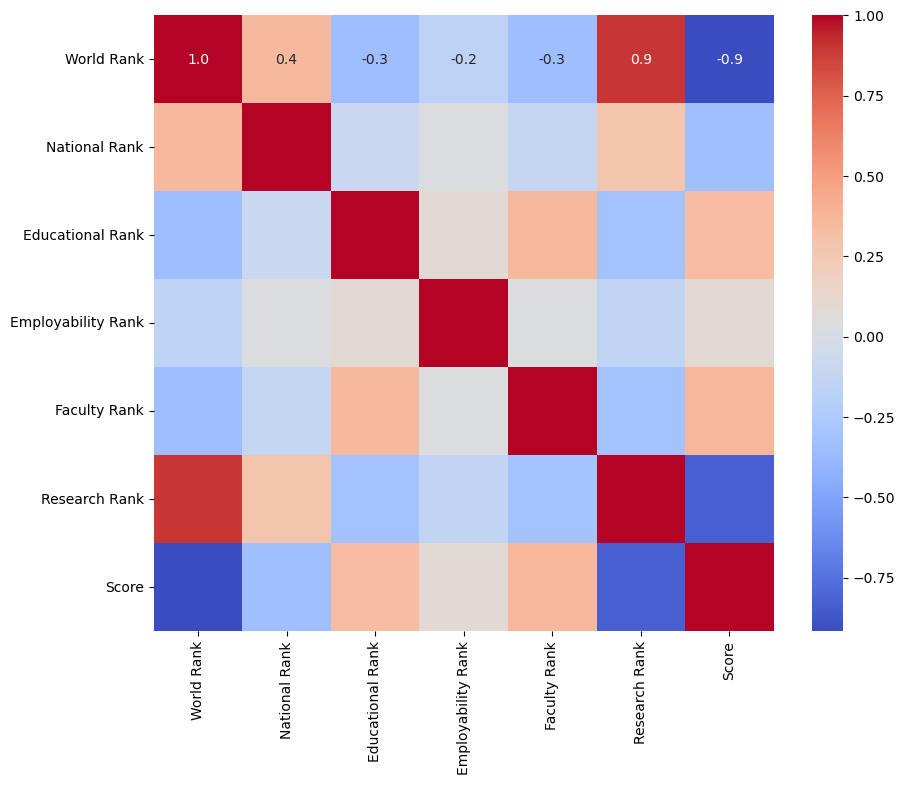

In [408]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
           
            cmap='coolwarm',
            fmt=".1f"  , annot=True# Format numbers to display one decimal place
           )

# Show the plot
plt.show()

In [ ]:
differences = df['National Rank'].diff()
differences

# # Any difference greater than 1 indicates a gap
has_gaps = (differences > 1).any()
has_gaps

In [ ]:
df

In [ ]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True, 
            cmap='coolwarm',
            fmt=".1f"
           )

# Show the plot
plt.show()


In [ ]:
df = df.replace(0, np.nan)

In [ ]:
#df['National Rank'] = df['National Rank'].replace(0, np.nan)

In [ ]:
df

In [417]:
# Calculate differences between consecutive ranks
differences = df['National Rank'].diff()

# Find indices where the difference is greater than 1
gap_indices = differences[differences > 1].index

# Iterate over gap indices and fill missing values
for idx in gap_indices:
    # Calculate number of missing values
    num_missing = int(differences.loc[idx] - 1)
    
    # Interpolate missing values
    df.loc[idx:idx+num_missing, 'National Rank'] = df.loc[idx-1, 'National Rank'] + 1

# Verify if any gaps remain
differences = df['National Rank'].diff()
has_gaps = (differences > 1).any()
print("Remaining gaps:", has_gaps)


Remaining gaps: True


In [ ]:
df.isnull().sum()

In [ ]:
 df.isnull().any(axis=1).sum()

In [420]:

saudi_arabia_df = df[df['Location'] == 'Saudi Arabia']

In [421]:
sorted_df = saudi_arabia_df.sort_values(by='World Rank')

In [422]:
sorted_df.head(10)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
244,245.0,King Abdulaziz University,Saudi Arabia,93,0,1330,0,186,77.8
278,279.0,King Abdullah University of Science and Techno...,Saudi Arabia,104,0,0,171,297,77.2
351,352.0,King Saud University,Saudi Arabia,136,0,344,0,332,76.1
656,657.0,King Fahd University of Petroleum and Minerals,Saudi Arabia,266,0,107,0,792,72.8
1310,1311.0,King Saud bin Abdulaziz University for Health ...,Saudi Arabia,561,0,0,0,1255,68.8
1446,1447.0,King Khalid University,Saudi Arabia,621,0,0,0,1385,68.1
1508,1509.0,Taif University,Saudi Arabia,650,0,0,0,1445,67.9
1546,1547.0,Imam Abdulrahman Bin Faisal University,Saudi Arabia,668,0,0,0,1484,67.7
1585,1586.0,Taibah University,Saudi Arabia,685,0,0,0,1520,67.5
1710,1711.0,Prince Sattam Bin Abdulaziz University,Saudi Arabia,744,0,0,0,1636,67.0


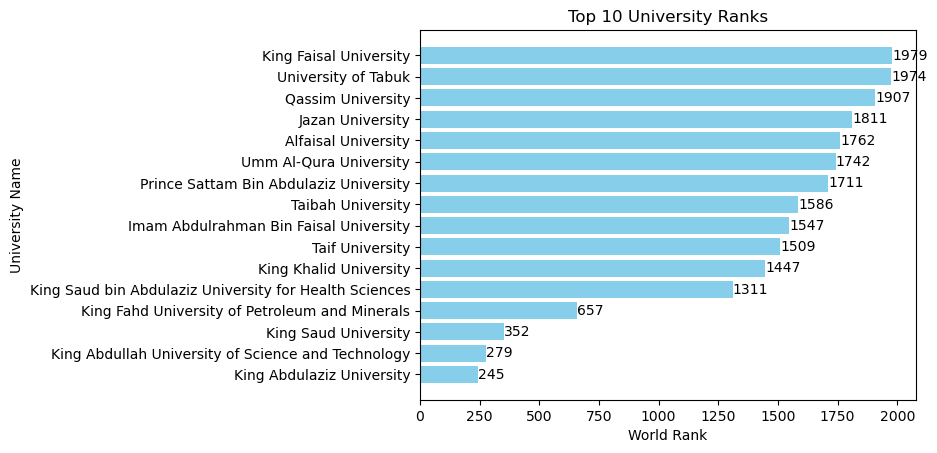

In [418]:
# Plot the bar chart
plt.barh(sorted_df['University Names'], sorted_df['World Rank'], color='skyblue')

# Add numbers above the bars
for index, value in enumerate(sorted_df['World Rank']):
    plt.text(value, index, str(value), ha='left', va='center', color='black')

# Add title and labels
plt.title('Top 10 University Ranks')
plt.xlabel('World Rank')
plt.ylabel('University Name')

# Show plot
plt.show()


In [ ]:
sorted_df = df.sort_values(by='Employability Rank')

In [ ]:
sorted_df.head(10)

In [602]:
import plotly.graph_objects as go

# Create bar chart trace
bar_trace = go.Bar(
    y=sorted_df['University Names'],
    x=sorted_df['World Rank'],
    orientation='h',  # horizontal orientation
    marker=dict(color='skyblue'),  # bar color
    text=sorted_df['World Rank'],  # text to display on hover
    textposition='outside',  # display text outside the bars
)

# Add annotations for the numbers above the bars
annotations = []
for index, value in enumerate(sorted_df['World Rank']):
    annotations.append(dict(x=value, y=index, text=str(value), showarrow=False, xanchor='left', yanchor='middle'))

# Define layout
layout = go.Layout(
    title='Top 10 University Ranks',
    xaxis=dict(title='World Rank'),
    yaxis=dict(title='University Name', autorange='reversed'),  # reverse y-axis to display highest rank at the top
)

# Create figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Add annotations to the figure
fig.update_layout(annotations=annotations)

# Show plot
fig.show()


KeyError: 'University Names'

In [601]:
import plotly.graph_objects as go

# Define custom colors
colors = ['rgb(255, 102, 102)', 'rgb(255, 204, 102)', 'rgb(255, 255, 102)', 'rgb(102, 255, 102)', 'rgb(102, 178, 255)', 
          'rgb(204, 102, 255)', 'rgb(255, 102, 178)', 'rgb(102, 255, 204)', 'rgb(178, 102, 255)', 'rgb(255, 178, 102)']

# Create bar chart trace with colorful palette
bar_trace = go.Bar(
    y=sorted_df['University Names'],
    x=sorted_df['World Rank'],
    orientation='h',
    marker=dict(color=colors[:len(sorted_df)]),
    text=sorted_df['World Rank'],
    textposition='outside',
)

# Define layout
layout = go.Layout(
    title='Top 10 University Ranks',
    xaxis=dict(title='World Rank', showgrid=False),  # hide gridlines on x-axis
    yaxis=dict(title='University Name', autorange='reversed', showgrid=False),  # reverse y-axis and hide gridlines on y-axis
    plot_bgcolor='rgba(0,0,0,0)',  # transparent plot background
    paper_bgcolor='rgba(0,0,0,0)',  # transparent paper background
    font=dict(family='Arial', size=12, color='black'),  # customize font style and size
    margin=dict(l=150, r=50, t=50, b=50),  # adjust margin to make space for long university names
)

# Create figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Show plot
fig.show()


KeyError: 'University Names'